## Exemplo 2 Decision Trees - Classificação de dia de golfe
Disciplina de Data Mining UFSC



In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

url = "https://codigos.ufsc.br/jonata.tyska/repositorio/-/raw/master/datasets/golf.csv"

# Read dataset to pandas dataframe
dataset = pd.read_csv(url)

dataset.head()

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [ ]:
X = dataset.drop('Play Golf',axis=1)
y = dataset['Play Golf']

In [ ]:
# Convert categorical variable into dummy/indicator variables or (binary variables) essentialy 1's and 0's
one_hot_data = pd.get_dummies(dataset[ ['Outlook', 'Temp', 'Humidity', 'Windy'] ])
#print the new dummy data
one_hot_data

,Windy,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temp_Cool,Temp_Hot,Temp_Mild,Humidity_High,Humidity_Normal
0,False,0,1,0,0,1,0,1,0
1,True,0,1,0,0,1,0,1,0
2,False,1,0,0,0,1,0,1,0
3,False,0,0,1,0,0,1,1,0
4,False,0,0,1,1,0,0,0,1
5,True,0,0,1,1,0,0,0,1
6,True,1,0,0,1,0,0,0,1
7,False,0,1,0,0,0,1,1,0
8,False,0,1,0,1,0,0,0,1
9,False,0,0,1,0,0,1,0,1


###Constrói o modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(one_hot_data,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred=model.predict(one_hot_data)
print(f"Acurácia do modelo é {sum(y_pred==y)/len(y)*100}%")

Acurácia do modelo é 100.0%


digraph Tree {
node [shape=box] ;
0 [label="X[1] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]"] ;
1 [label="X[7] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[0] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
2 -> 3 ;
4 [label="X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
2 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
4 -> 6 ;
7 [label="X[2] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
1 -> 7 ;
8 [label="X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
7 -> 8 ;
9 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
8 -> 9 ;
10 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
8 -> 10 ;
11 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
7 -> 11 ;
12 [label="gini = 0.0\nsamples = 4\nvalue = [0, 4]"] ;
0 -> 12 [labeldistance=

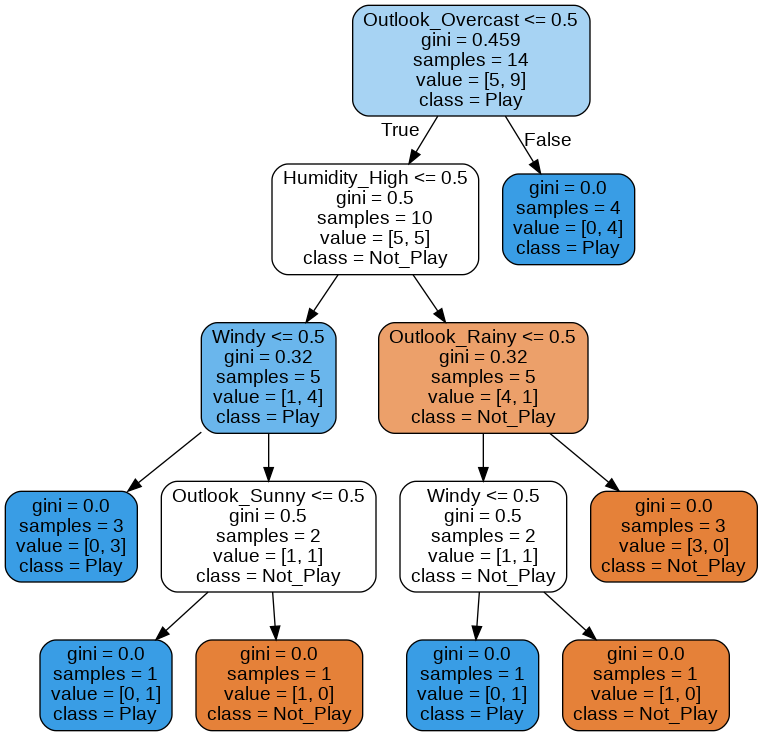

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus 
from IPython.display import Image  # To Display a image of our graph
# Export/Print a decision tree in DOT format.
print(export_graphviz(model, None))

#Create Dot Data
dot_data = export_graphviz(model, out_file=None, feature_names=list(one_hot_data.columns.values), 
                                class_names=['Not_Play', 'Play'], rounded=True, filled=True) #Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes
#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

exemplo extraído de: https://medium.com/@randerson112358/python-decision-tree-classifier-example-d73bc3aeca6